In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
image = cv2.imread('test_2.jpg')
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

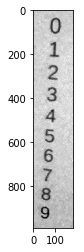

In [3]:
plt.imshow(image_grayscale, cmap='gray')

In [6]:
def floodfill(mat, y, x, c1, c2):
    if y > len(mat) or x > len(mat[y]):
        return
    if mat[y][x] != c1:
        return
    mat[y][x] = c2
    floodfill(mat, y + 1, x, c1, c2)
    floodfill(mat, y - 1, x, c1, c2)
    floodfill(mat, y, x + 1, c1, c2)
    floodfill(mat, y, x - 2, c1, c2)
    
def check_border(mat, y, x):
    height, width = mat.shape
    if mat[y][x] == 0:
        return False
    if y == 0 or x == 0 or y == height - 1 or x == width - 1:
        return True
    if 0 in [mat[y+1][x], mat[y-1][x], mat[y][x+1], mat[y][x-1]]:
        return True
    return False

def generate_chain_code(mat, y, x):
    if mat[y][x] < 0:
        return []
    cluster_id = mat[y][x]
    mat[y][x] *= -1
    dx = [0, 1, 1, 1, 0, -1, -1, -1]
    dy = [-1, -1, 0, 1, 1, 1, 0, -1]
    for d, temp in enumerate(zip(dx, dy)):
        ix, iy = temp
        nx, ny = x + ix, y + iy
        if nx > 0 and nx < len(mat[ny]) and ny > 0 and ny < len(mat) and mat[ny][nx] == cluster_id and check_border(mat, ny, nx):
            return [d] + generate_chain_code(mat, ny, nx)
    return []

def stretch_chain_code(chain_code, len_dest):
    ret = []
    if len(chain_code) < len_dest:
        scale =  len_dest / len(chain_code)
        for i in range(len_dest):
            ret += [chain_code[min(round(i/scale),(len(chain_code) - 1))]]
    else:
        scale = len(chain_code) / len_dest
        for i in range(len_dest):
            i_from = round(i*scale)
            i_to = min(round(i_from + scale), (len(chain_code)-1))
            ret += [max(set(chain_code[i_from:i_to]), key=chain_code[i_from:i_to].count)]
    return ret

def generate_all_chain_code(mat):
    height, width = mat.shape

    cluster = 0
    for y in range(height):
        for x in range(width):
            if mat[y][x] == -1:
                cluster += 1
                floodfill(mat, y, x, -1, cluster)
                
    chain_codes = []
    for y in range(height):
        for x in range(width):
            if mat[y][x] > 0 and abs(mat[y][x]) not in chain_codes and check_border(mat, y, x):
                cluster_id = mat[y][x]
                chain_code = generate_chain_code(mat, y, x)
                chain_codes.append(chain_code)

    return chain_codes

def get_all_chain_codes_in_image(image):
    threshold = 110
    image_mat = np.vectorize(lambda x: -1 if x < threshold else 0)(image)
    return generate_all_chain_code(image_mat)

In [7]:
get_all_chain_codes_in_image(image_grayscale)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()